
6) Expectation Maximization without scikit learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from scipy.stats import gaussian_kde

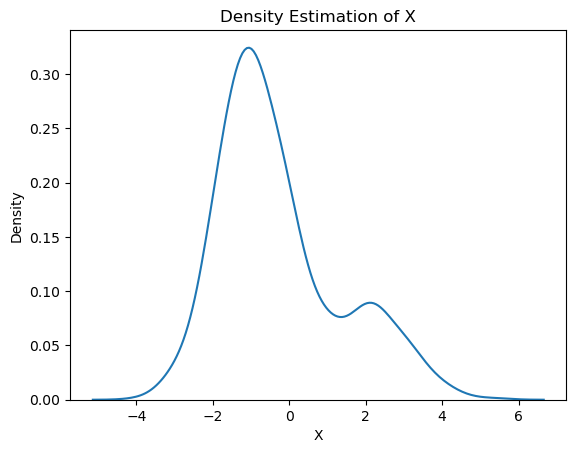

In [ ]:
mu1, sigma1 = 2, 1
mu2, sigma2 = -1, 0.8
X1 = np.random.normal(mu1, sigma1, size=200)
X2 = np.random.normal(mu2, sigma2, size=600)
X = np.concatenate([X1, X2])

sns.kdeplot(X)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation of X')
plt.show()

In [ ]:
mu1_hat, sigma1_hat = np.mean(X1), np.std(X1)
mu2_hat, sigma2_hat = np.mean(X2), np.std(X2)
pi1_hat, pi2_hat = len(X1) / len(X), len(X2) / len(X)

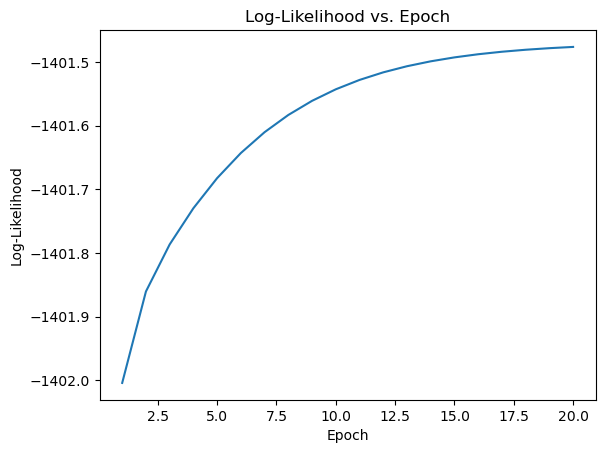

In [ ]:
num_epochs = 20
log_likelihoods = []

for epoch in range(num_epochs):
	gamma1 = pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
	gamma2 = pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)
	total = gamma1 + gamma2
	gamma1 /= total
	gamma2 /= total

	mu1_hat = np.sum(gamma1 * X) / np.sum(gamma1)
	mu2_hat = np.sum(gamma2 * X) / np.sum(gamma2)
	sigma1_hat = np.sqrt(np.sum(gamma1 * (X - mu1_hat)**2) / np.sum(gamma1))
	sigma2_hat = np.sqrt(np.sum(gamma2 * (X - mu2_hat)**2) / np.sum(gamma2))
	pi1_hat = np.mean(gamma1)
	pi2_hat = np.mean(gamma2)

	log_likelihood = np.sum(np.log(pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
								+ pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)))
	log_likelihoods.append(log_likelihood)

plt.plot(range(1, num_epochs+1), log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Epoch')
plt.show()

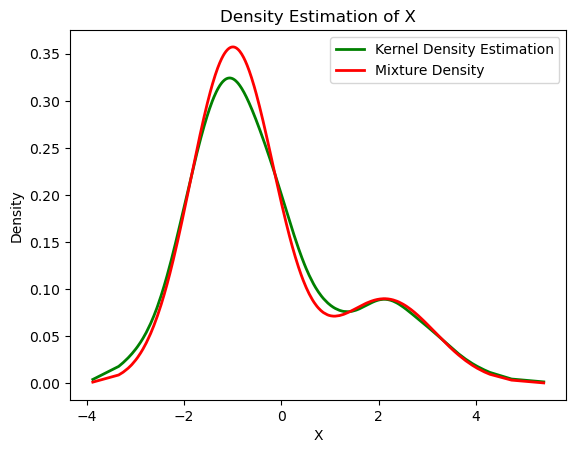

In [ ]:
X_sorted = np.sort(X)
density_estimation = pi1_hat*norm.pdf(X_sorted,
										mu1_hat,
										sigma1_hat) + pi2_hat * norm.pdf(X_sorted,
																		mu2_hat,
																		sigma2_hat)


plt.plot(X_sorted, gaussian_kde(X_sorted)(X_sorted), color='green', linewidth=2)
plt.plot(X_sorted, density_estimation, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation of X')
plt.legend(['Kernel Density Estimation','Mixture Density'])
plt.show()



6) Expectation Maximization with scikit learn

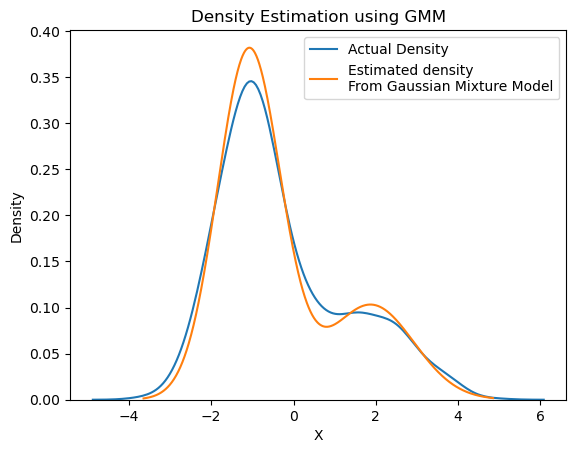

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
import seaborn as sns

mu1, sigma1 = 2, 1
mu2, sigma2 = -1, 0.8
X1 = np.random.normal(mu1, sigma1, size=200)
X2 = np.random.normal(mu2, sigma2, size=600)
X = np.concatenate([X1, X2])
X = X.reshape(-1, 1)
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X)

x_grid = np.linspace(min(X), max(X), 1000).reshape(-1, 1)
density_estimation = np.exp(gmm.score_samples(x_grid))
sns.kdeplot(X, label = "Actual Density")
plt.plot(x_grid, density_estimation, label='Estimated density\nFrom Gaussian Mixture Model')
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation using GMM')
plt.legend()
plt.show()


7) Ensemble learning - random forest

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import mode

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier_1 = RandomForestClassifier(n_estimators=9, random_state=42)
rf_classifier_2 = RandomForestClassifier(n_estimators=1, random_state=7)
rf_classifier_3 = RandomForestClassifier(n_estimators=8, random_state=0)

rf_classifier_1.fit(X_train, y_train)
rf_classifier_2.fit(X_train, y_train)
rf_classifier_3.fit(X_train, y_train)

predictions_1 = rf_classifier_1.predict(X_train)
predictions_2 = rf_classifier_2.predict(X_train)
predictions_3 = rf_classifier_3.predict(X_train)

accuracy_1 = accuracy_score(y_train, predictions_1)
accuracy_2 = accuracy_score(y_train, predictions_2)
accuracy_3 = accuracy_score(y_train, predictions_3)

ensemble_accuracy , _ = mode([accuracy_1, accuracy_2, accuracy_3], axis=0)

print(f'Ensemble Accuracy 1: {accuracy_1}')
print(f'Ensemble Accuracy 2: {accuracy_2}')
print(f'Ensemble Accuracy 3: {accuracy_3}')
print(f'Ensemble Accuracy : {ensemble_accuracy}')

Ensemble Accuracy 1: 1.0
Ensemble Accuracy 2: 0.9333333333333333
Ensemble Accuracy 3: 1.0
Ensemble Accuracy : 1.0


8) Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

data = {'Feature1': [1, 2, 2, 1, 3, 3, 1, 2, 3, 3],
        'Feature2': ['A', 'B', 'B', 'A', 'C', 'C', 'A', 'B', 'C', 'C'],
        'Class': [0, 1, 1, 0, 1, 1, 0, 1, 1, 0]}

df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=['Feature2'])

X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)

nb_classifier = CategoricalNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



9) Apriori Algorithm

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

transactions = [['Milk', 'Bread', 'Butter'],
                ['Milk', 'Bread'],
                ['Milk', 'Diapers'],
                ['Milk', 'Beer', 'Diapers'],
                ['Bread', 'Butter'],
                ['Bread', 'Beer'],
                ['Butter', 'Diapers'],
                ['Bread', 'Beer', 'Diapers']]

encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)
df = pd.DataFrame(onehot, columns=encoder.columns_)

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("Frequent Itemsets:")
print(frequent_itemsets)

print("Association Rules:")
print(rules)

Frequent Itemsets:
    support                itemsets
0     0.375                  (Beer)
1     0.625                 (Bread)
2     0.375                (Butter)
3     0.500               (Diapers)
4     0.500                  (Milk)
5     0.250           (Beer, Bread)
6     0.250         (Diapers, Beer)
7     0.125            (Beer, Milk)
8     0.250         (Butter, Bread)
9     0.125        (Diapers, Bread)
10    0.250           (Bread, Milk)
11    0.125       (Diapers, Butter)
12    0.125          (Butter, Milk)
13    0.250         (Diapers, Milk)
14    0.125  (Diapers, Beer, Bread)
15    0.125   (Diapers, Beer, Milk)
16    0.125   (Butter, Bread, Milk)
Association Rules:
        antecedents consequents  antecedent support  consequent support  \
0  (Diapers, Bread)      (Beer)               0.125               0.375   
1      (Beer, Milk)   (Diapers)               0.125               0.500   
2    (Butter, Milk)     (Bread)               0.125               0.625   

   support  c

10) PCA

Explained Variance Ratio:
[1. 0.]
Principal Components: [[-2.45,  0.  ],
 [-1.22, -0.  ],
 [ 0.  , -0.  ],
 [ 1.22,  0.  ],
 [ 2.45,  0.  ]]


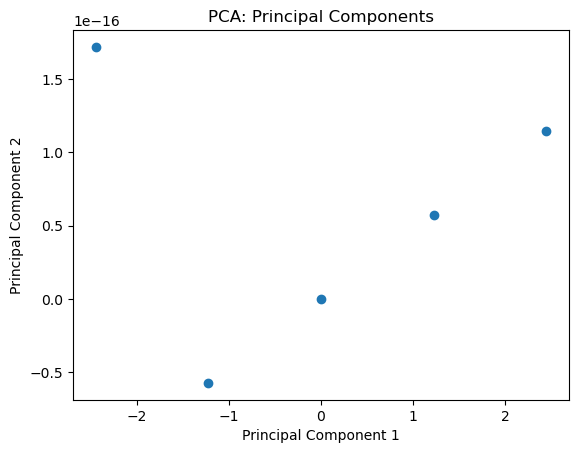

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1],
    'Feature3': [2, 3, 4, 5, 6]
}

df = pd.DataFrame(data)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

formatted_principal_components = np.array2string(principal_components, precision=2, separator=', ')
print("Principal Components:", formatted_principal_components)

plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.title('PCA: Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()